<a href="https://colab.research.google.com/github/jessy-suresh/PRACTICE-QUESTIONS-MACHINE-LEARNING/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self):
        self.slope = None
        self.intercept = None

    def fit(self, X, y):
        """
        Fit linear regression model using normal equation
        X: feature matrix (n_samples, n_features)
        y: target vector (n_samples,)
        """
        # Add bias term (intercept)
        X_with_bias = np.column_stack([np.ones(X.shape[0]), X])

        # Normal equation: θ = (X^T X)^(-1) X^T y
        theta = np.linalg.inv(X_with_bias.T @ X_with_bias) @ X_with_bias.T @ y

        self.intercept = theta[0]
        self.slope = theta[1:]

    def predict(self, X):
        """Make predictions"""
        if self.slope is None:
            raise ValueError("Model must be fitted before prediction")
        return self.intercept + X @ self.slope

    def score(self, X, y):
        """Calculate R-squared score"""
        y_pred = self.predict(X)
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        return 1 - (ss_res / ss_tot)

# Generate sample data
np.random.seed(42)
X = np.random.randn(100, 1) * 10  # Single feature
y = 2.5 * X.flatten() + 1.5 + np.random.randn(100) * 2  # y = 2.5x + 1.5 + noise

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Make predictions
X_test = np.array([[5], [10], [15]])
predictions = model.predict(X_test)

print(f"Intercept: {model.intercept:.2f}")
print(f"Slope: {model.slope[0]:.2f}")
print(f"Predictions for [5, 10, 15]: {predictions}")

Intercept: 1.51
Slope: 2.47
Predictions for [5, 10, 15]: [13.8715985  26.22834134 38.58508418]


In [2]:
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.theta = None
        self.loss_history = []

    def fit(self, X, y):
        """Fit using gradient descent"""
        # Add bias term
        X_with_bias = np.column_stack([np.ones(X.shape[0]), X])

        # Initialize parameters
        self.theta = np.random.randn(X_with_bias.shape[1])

        for i in range(self.n_iter):
            # Predictions
            y_pred = X_with_bias @ self.theta

            # Compute gradients
            gradients = (2 / len(y)) * X_with_bias.T @ (y_pred - y)

            # Update parameters
            self.theta -= self.learning_rate * gradients

            # Compute and store loss
            loss = np.mean((y_pred - y) ** 2)
            self.loss_history.append(loss)

    def predict(self, X):
        """Make predictions"""
        if self.theta is None:
            raise ValueError("Model must be fitted before prediction")
        X_with_bias = np.column_stack([np.ones(X.shape[0]), X])
        return X_with_bias @ self.theta

# Usage example
model_gd = LinearRegressionGD(learning_rate=0.01, n_iter=1000)
model_gd.fit(X, y)
predictions_gd = model_gd.predict(X_test)

print(f"GD Parameters: {model_gd.theta}")

GD Parameters: [1.51485566 2.47134857]


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Generate more complex data
np.random.seed(42)
X_multi = np.random.randn(200, 3)  # 3 features
y_multi = (2 * X_multi[:, 0] +
           -1.5 * X_multi[:, 1] +
           0.5 * X_multi[:, 2] +
           3 + np.random.randn(200) * 1.5)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit model
sklearn_model = LinearRegression()
sklearn_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = sklearn_model.predict(X_test_scaled)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Sklearn Coefficients: {sklearn_model.coef_}")
print(f"Sklearn Intercept: {sklearn_model.intercept_:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Sklearn Coefficients: [ 1.64414024 -1.35478886  0.65146734]
Sklearn Intercept: 3.40
Mean Squared Error: 1.93
R-squared Score: 0.76


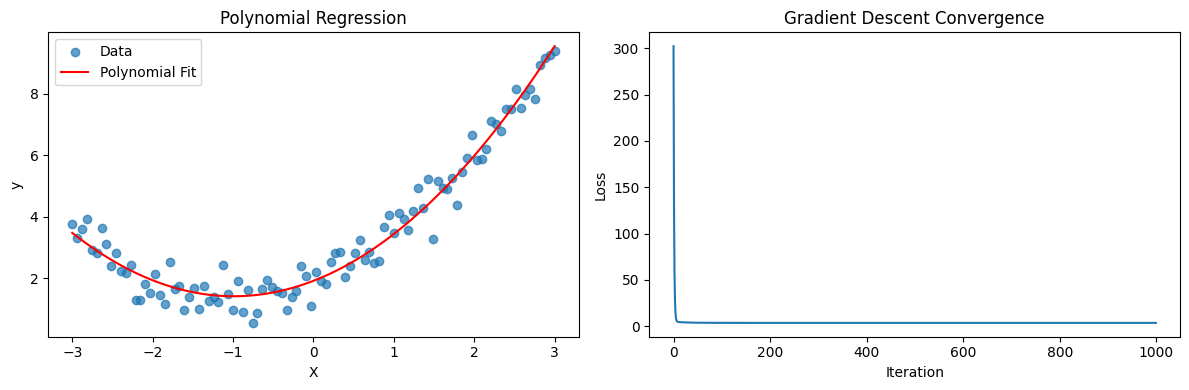

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Generate non-linear data
np.random.seed(42)
X_nonlinear = np.linspace(-3, 3, 100).reshape(-1, 1)
y_nonlinear = 0.5 * X_nonlinear**2 + X_nonlinear + 2 + np.random.randn(100, 1) * 0.5

# Create polynomial regression pipeline
poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])

# Fit and predict
poly_model.fit(X_nonlinear, y_nonlinear)
y_poly_pred = poly_model.predict(X_nonlinear)

# Plot results
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(X_nonlinear, y_nonlinear, alpha=0.7, label='Data')
plt.plot(X_nonlinear, y_poly_pred, color='red', label='Polynomial Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.legend()

plt.subplot(1, 2, 2)
# Plot loss history from gradient descent
plt.plot(model_gd.loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Gradient Descent Convergence')

plt.tight_layout()
plt.show()

In [5]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import cross_val_score

# Load California housing dataset
california = fetch_california_housing()
X = california.data
y = california.target

# Create DataFrame for better visualization
df = pd.DataFrame(X, columns=california.feature_names)
df['Price'] = y

print("Dataset shape:", X.shape)
print("\nFirst few rows:")
print(df.head())

# Prepare data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
final_model = LinearRegression()
final_model.fit(X_train_scaled, y_train)

# Evaluate
train_score = final_model.score(X_train_scaled, y_train)
test_score = final_model.score(X_test_scaled, y_test)
y_pred = final_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)

print(f"\nModel Performance:")
print(f"Training R²: {train_score:.4f}")
print(f"Test R²: {test_score:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# Cross-validation
cv_scores = cross_val_score(final_model, X_train_scaled, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': california.feature_names,
    'coefficient': final_model.coef_
}).sort_values('coefficient', key=abs, ascending=False)

print(f"\nFeature Importance:")
print(feature_importance)

Dataset shape: (20640, 8)

First few rows:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  

Model Performance:
Training R²: 0.6126
Test R²: 0.5758
Mean Squared Error: 0.5559
Cross-validation scores: [0.62011512 0.61298876 0.6134416  0.61069973 0.60017477]
Mean CV score: 0.6115 (+/- 0.0129)

Feature Importance:
      feature  coefficient
6    Latitude    -0.896929
7   Longitude    -0.869842
0      MedInc     0.854383
3   AveBedrms     0.339259
2    AveRoom